## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`. Run the cell below to visualize a single estimator from a random forest model, using the Iris dataset to classify the data into the appropriate species.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
import pandas as pd

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.items()

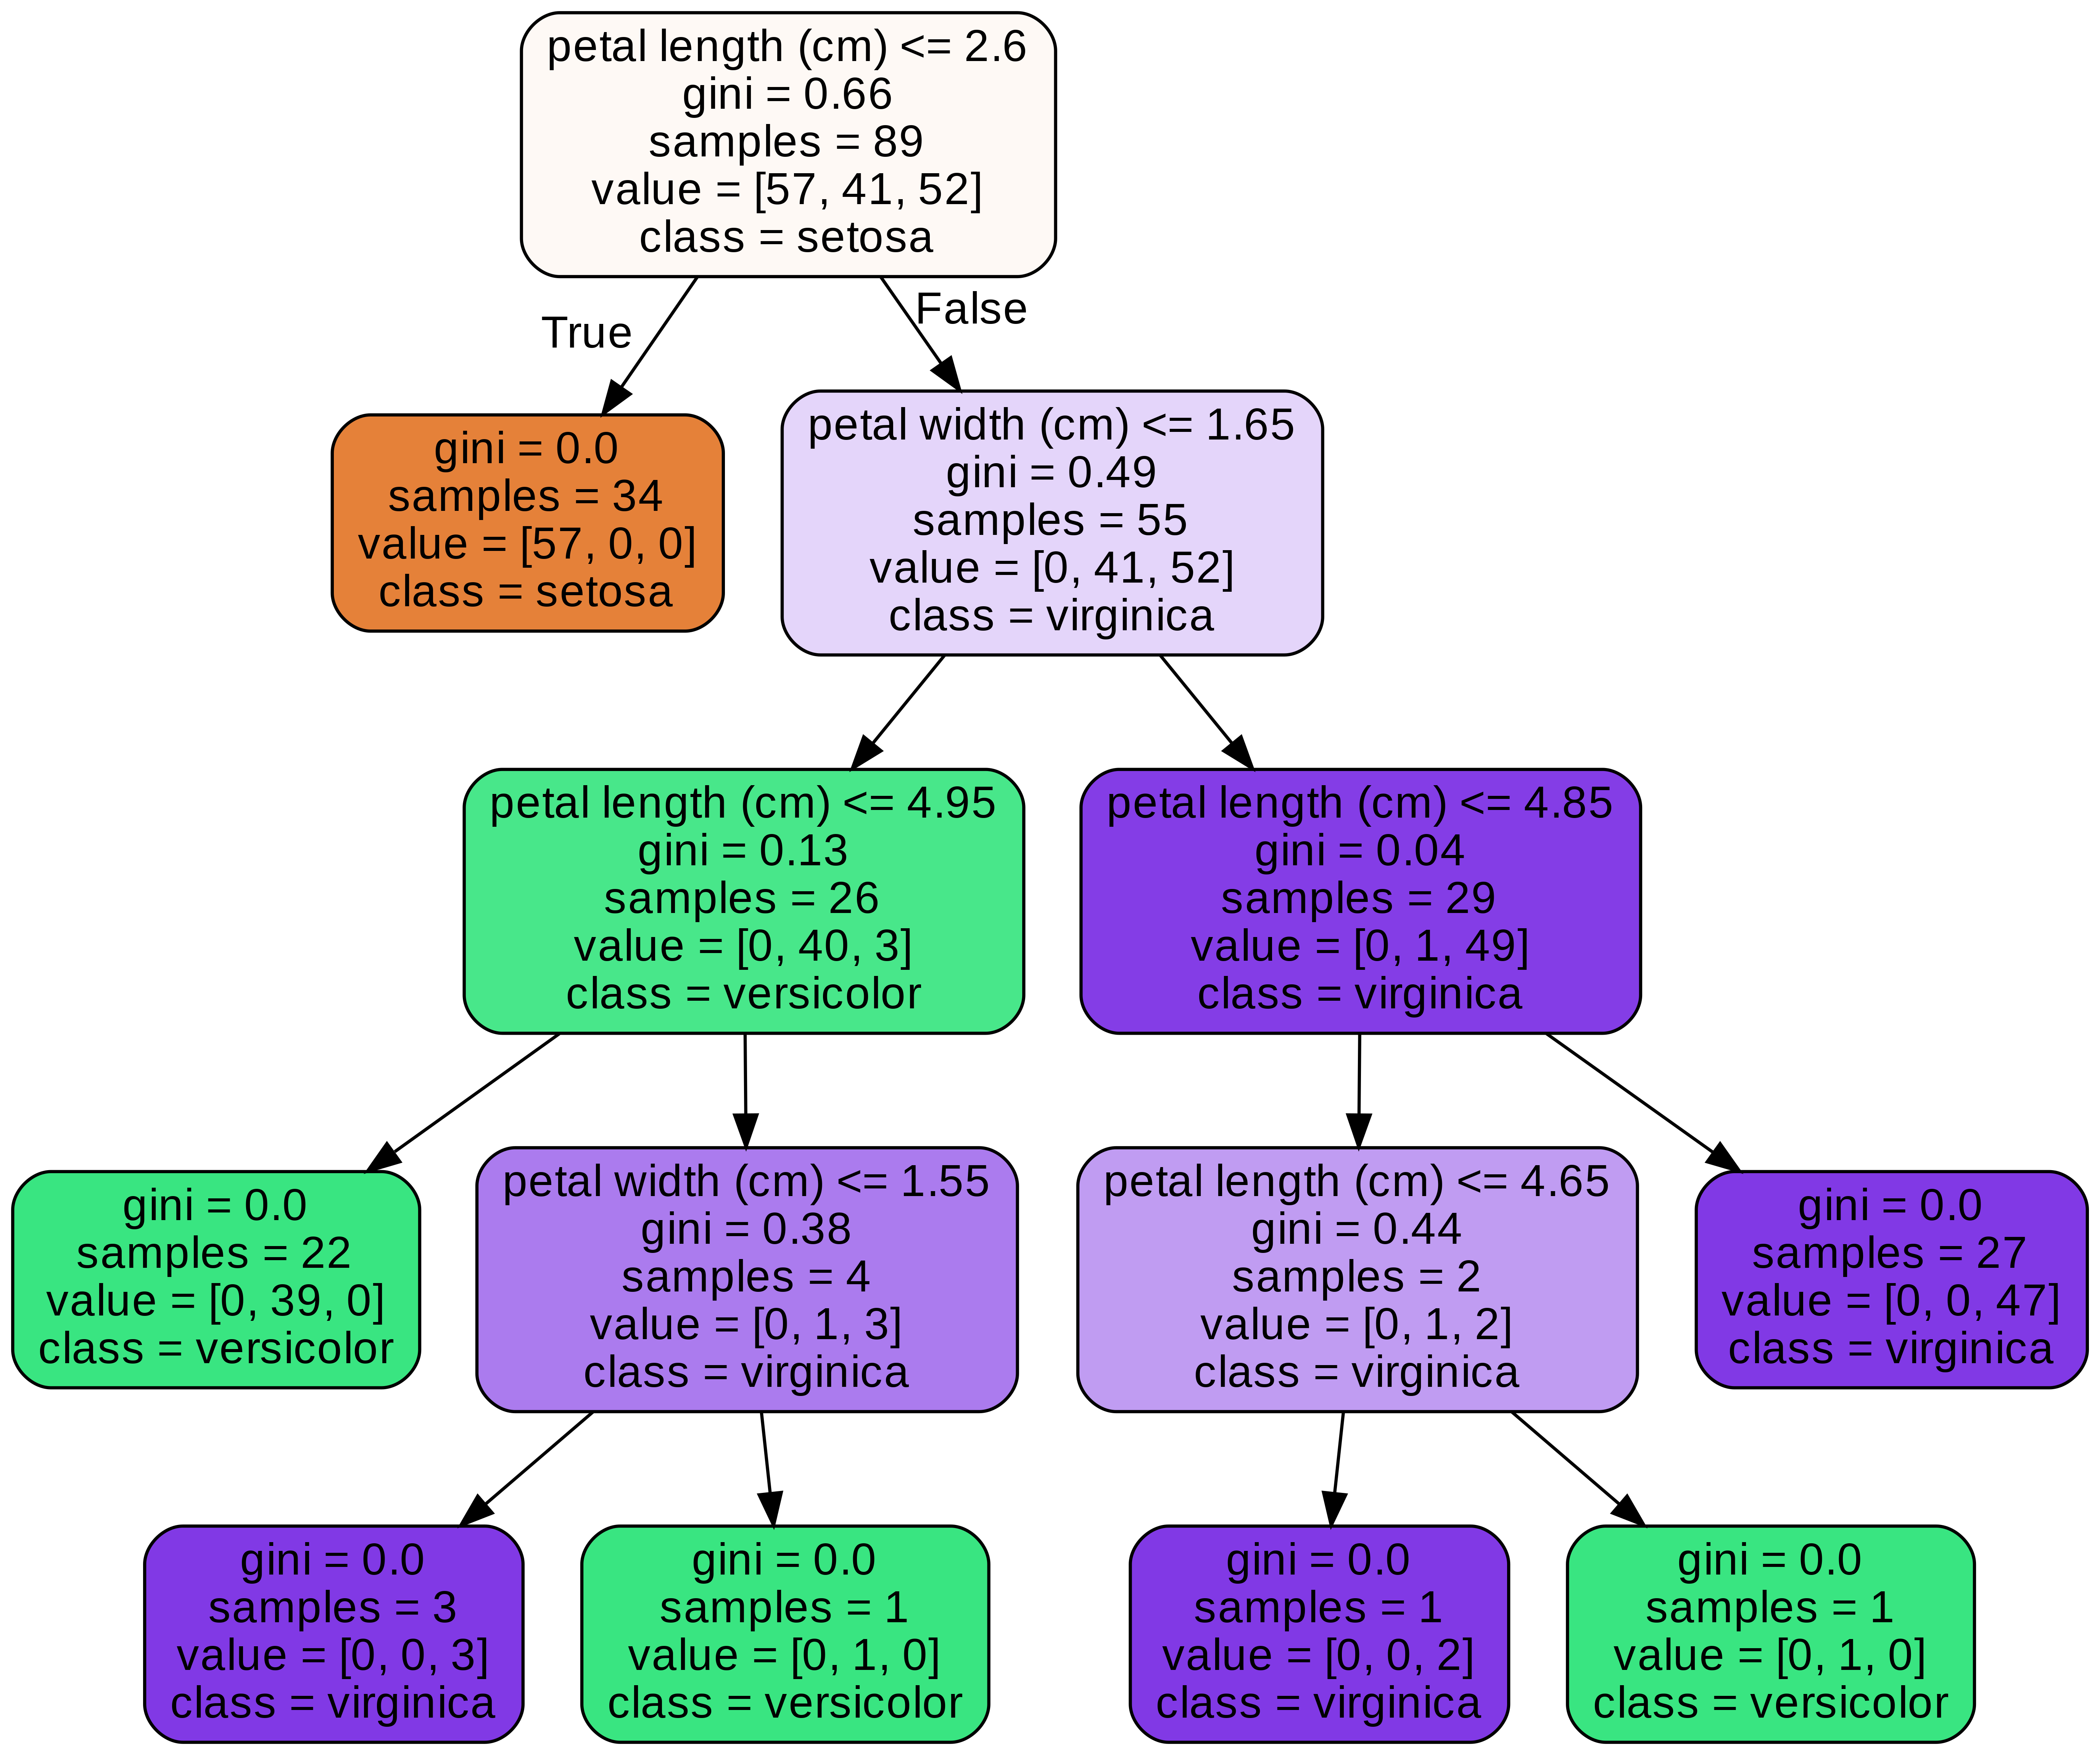

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
# (TN) The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes.
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Notice how each split seperates the data into buckets of similar observations. This is a single tree and a relatively simple classification dataset, but the same method is used in a more complex dataset with greater depth to the trees.

In [ ]:
iris.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [ ]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
# (TN) Let try to save data from Colab to Google drive
# Create df from iris.data
df = pd.DataFrame(iris.data)

In [ ]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Export data
from google.colab import files

df.to_csv('zzztry.csv', encoding = 'utf-8-sig') 
files.download('zzztry.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project was continuing to spread throughout the world. Many governments recommended only essential outings to public places and closed most business that do not serve food or sell essential items. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

This case study was designed to drive home the important role that data science plays in real-world situations like this pandemic. This case study uses the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on this important topic. The goal of the case study is to build a Random Forest Classifier to predict the 'state' of the patient.

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

ModuleNotFoundError: No module named 'plotly'

In [2]:
# Import imputer
from sklearn.impute import SimpleImputer

In [ ]:
# (TN) If you work with Google Colab, this method will not work. Use the cell below.
url ='SouthKoreacoronavirusdataset/PatientInfo.csv'
df = pd.read_csv(url)
df.head()

FileNotFoundError: ignored

In [ ]:
# (TN) Read data into Google Colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Springboard asgmts/14.4.4 Case random forest/RandomForest Covid Case Study_06302020/SouthKoreacoronavirusdataset/PatientInfo.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1000000096,4645.0,male,1982.0,30s,Korea,Seoul,Dobong-gu,NaN,etc,NaN,NaN,NaN,2020-03-01,2020-03-02,NaN,NaN,isolated
96,1000000097,4709.0,male,1985.0,30s,Korea,Seoul,Yangcheon-gu,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
97,1000000098,4743.0,male,1966.0,50s,Korea,Seoul,Seocho-gu,NaN,etc,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
98,1000000099,5377.0,female,1996.0,20s,Korea,Seoul,Dongdaemun-gu,NaN,etc,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated


In [ ]:
df.shape

(2218, 18)

In [ ]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [ ]:
# TN Don't run this whole cell. Let do this line by line below 

#Counts of null values 
#na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
#na_df.columns = ['VarName', 'NullCount']
#na_df[(na_df['NullCount']>0)]

In [ ]:
#Counts of null values
temp = df.isnull().sum().sort_values(ascending=False)

In [ ]:
type(temp)

pandas.core.series.Series

In [ ]:
temp.head()

disease               2199
deceased_date         2186
infection_order       2176
symptom_onset_date    2025
released_date         1995
dtype: int64

In [ ]:
na_df = pd.DataFrame(temp)
type(na_df)

pandas.core.frame.DataFrame

In [ ]:
na_df.head()

,0
disease,2199
deceased_date,2186
infection_order,2176
symptom_onset_date,2025
released_date,1995


In [ ]:
# (TN) When we reset the index, the old index is added as a column, and a new sequential index is used
# (TN) If drop=True then teh old index is dropped
na_df = na_df.reset_index()
na_df.head()

,index,0
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995


In [ ]:
na_df.columns = ['VarName', 'NullCount']
na_df.tail(10)

,VarName,NullCount
8,global_num,904
9,birth_year,454
10,age,261
11,sex,145
12,confirmed_date,141
13,state,88
14,city,65
15,province,0
16,country,0
17,patient_id,0


In [ ]:
na_df.shape

(18, 2)

In [ ]:
# This is to view row with NullCount > 0
# na_df dataframe doesn't change; still have 18 rows. Yes this is not an assignment operation
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [ ]:
#counts of response variable values
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

 **<font color='teal'> Create a new column named 'n_age' which is the calculated age based on the birth year column.</font>**

In [ ]:
df['n_age'] = 2020 - df['birth_year']

In [ ]:
df[['birth_year', 'n_age']].sample(10)

,birth_year,n_age
211,1998.0,22.0
171,1965.0,55.0
792,1967.0,53.0
2013,NaN,NaN
2012,NaN,NaN
1751,NaN,NaN
1533,1927.0,93.0
1570,1948.0,72.0
201,1959.0,61.0
814,1968.0,52.0


### Handle Missing Values

 **<font color='teal'> Print the number of missing values by column.</font>**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

disease               2199
deceased_date         2186
infection_order       2176
symptom_onset_date    2025
released_date         1995
contact_number        1807
infected_by           1749
infection_case        1055
global_num             904
n_age                  454
birth_year             454
age                    261
sex                    145
confirmed_date         141
state                   88
city                    65
province                 0
country                  0
patient_id               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

 **<font color='teal'> Fill the 'disease' missing values with 0 and remap the True values to 1.</font>**

(TN) df.disease dtype is object. Here it includes nan (special float) and True (Boolean). See below for Thanh's investigation. 

In [ ]:
df.disease.value_counts()

True    19
Name: disease, dtype: int64

In [ ]:
df.disease.unique()

array([nan, True], dtype=object)

In [ ]:
df.disease.isna().sum()

2199

In [ ]:
df.disease.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: disease, dtype: object

In [ ]:
type(df.disease[1])

float

In [ ]:
# TN NaN is special float
pd.isna(df.disease[1])

True

In [ ]:
df[df['disease'] == True].head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
388,1200000038,38.0,female,1963.0,50s,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0
431,1200001288,1288.0,male,1955.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-03-02,deceased,65.0
433,1200001921,1921.0,male,1953.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased,67.0
434,1200002085,2085.0,male,1949.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-04,deceased,71.0
436,1200002614,2614.0,female,1943.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-01,deceased,77.0


In [ ]:
type(df.disease[388])

bool

In [ ]:
df['disease_1'] = df['disease']
df['disease_1'] = df['disease_1'].replace({True: 1, np.NaN: 0})

# (TN) if Thanh just do df['disease_1'].replace({"True": 1, np.NaN: 0})
# It will be a 'view', but df['disease_1'] does not change. Have to use assignment operation

In [ ]:
df[['disease','disease_1']].sample(10)

,disease,disease_1
987,NaN,0
1072,NaN,0
2009,NaN,0
942,NaN,0
2070,NaN,0
1504,NaN,0
1642,NaN,0
107,NaN,0
1684,NaN,0
520,NaN,0


In [ ]:
df[df['disease_1'] == 1][['disease', 'disease_1']].head()

,disease,disease_1
388,True,1
431,True,1
433,True,1
434,True,1
436,True,1


In [ ]:
df.disease_1.value_counts()

0    2199
1      19
Name: disease_1, dtype: int64

In [ ]:
# TN copy data to Google drive (and go sleep)
from google.colab import files
df.to_csv('df_temp.csv', encoding = 'utf-8-sig') 
files.download('df_temp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# (TN) Read data from file df_temp.csv
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Springboard asgmts/14.4.4 Case random forest/RandomForest Covid Case Study_06302020/SouthKoreacoronavirusdataset/df_temp.csv"
df = pd.read_csv(path, index_col = 0)

In [5]:
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age,disease_1
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56.0,0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33.0,0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56.0,0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,29.0,0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,28.0,0


In [6]:
df.shape

(2218, 20)

Remove date columns from the data.


In [7]:
# TN: I removed this cell up here before filling NA
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'], axis =1)

In [8]:
df.shape

(2218, 16)

In [9]:
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age,disease_1
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,released,56.0,0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,released,33.0,0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,released,56.0,0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,released,29.0,0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,released,28.0,0


In [10]:
# Check disease_1
df[df['disease_1'] == 1][['disease', 'disease_1']].head()

,disease,disease_1
388,True,1
431,True,1
433,True,1
434,True,1
436,True,1


In [11]:
df.disease_1.value_counts()

0    2199
1      19
Name: disease_1, dtype: int64

 **<font color='teal'> Fill null values in the following columns with their mean: 'global_number','birth_year','infection_order','infected_by'and 'contact_number'</font>**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2217
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       2218 non-null   int64  
 1   global_num       1314 non-null   float64
 2   sex              2073 non-null   object 
 3   birth_year       1764 non-null   float64
 4   age              1957 non-null   object 
 5   country          2218 non-null   object 
 6   province         2218 non-null   object 
 7   city             2153 non-null   object 
 8   disease          19 non-null     object 
 9   infection_case   1163 non-null   object 
 10  infection_order  42 non-null     float64
 11  infected_by      469 non-null    float64
 12  contact_number   411 non-null    float64
 13  state            2130 non-null   object 
 14  n_age            1764 non-null   float64
 15  disease_1        2218 non-null   int64  
dtypes: float64(6), int64(2), object(8)
memory usage: 294.6+ KB


In [12]:
list_org = ['global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number']
df[list_org].describe()

,global_num,birth_year,infection_order,infected_by,contact_number
count,1314.000000,1764.000000,42.000000,4.690000e+02,411.000000
mean,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954
std,2874.044464,19.412643,1.254955,1.570638e+09,91.087792
min,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1908.500000,1962.000000,1.250000,1.200000e+09,2.000000
50%,5210.500000,1974.500000,2.000000,2.000000e+09,5.000000
75%,7481.500000,1993.000000,3.000000,4.100000e+09,16.000000
max,8717.000000,2020.000000,6.000000,6.113000e+09,1160.000000


In [13]:
imp_num = SimpleImputer(strategy="mean")
# list_org = ['global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number']
list_imp = ['global_num_1', 'birth_year_1', 'infection_order_1', 'infected_by_1', 'contact_number_1']
df[list_imp] = imp_num.fit_transform(df[list_org])

In [14]:
df[list_imp].describe()

,global_num_1,birth_year_1,infection_order_1,infected_by_1,contact_number_1
count,2218.000000,2218.000000,2218.000000,2.218000e+03,2218.000000
mean,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954
std,2211.785463,17.311232,0.170662,7.216328e+08,39.171414
min,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,4205.250000,1965.000000,2.285714,2.600789e+09,24.128954
50%,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954
75%,5900.250000,1988.000000,2.285714,2.600789e+09,24.128954
max,8717.000000,2020.000000,6.000000,6.113000e+09,1160.000000


In [16]:
df[list_org + list_imp].sample(10)

,global_num,birth_year,infection_order,infected_by,contact_number,global_num_1,birth_year_1,infection_order_1,infected_by_1,contact_number_1
854,8351.0,1960.0,NaN,2.000000e+09,NaN,8351.000000,1960.000000,2.285714,2.000000e+09,24.128954
1394,5476.0,1980.0,NaN,NaN,NaN,5476.000000,1980.000000,2.285714,2.600789e+09,24.128954
1655,NaN,NaN,NaN,NaN,NaN,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954
270,8455.0,1994.0,NaN,NaN,NaN,8455.000000,1994.000000,2.285714,2.600789e+09,24.128954
1763,NaN,NaN,NaN,NaN,NaN,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954
755,7663.0,1976.0,NaN,1.000000e+09,NaN,7663.000000,1976.000000,2.285714,1.000000e+09,24.128954
1229,4199.0,1938.0,NaN,NaN,NaN,4199.000000,1938.000000,2.285714,2.600789e+09,24.128954
2050,NaN,1983.0,NaN,NaN,NaN,4664.816591,1983.000000,2.285714,2.600789e+09,24.128954
1404,5501.0,1995.0,NaN,NaN,NaN,5501.000000,1995.000000,2.285714,2.600789e+09,24.128954
152,7740.0,1970.0,NaN,NaN,NaN,7740.000000,1970.000000,2.285714,2.600789e+09,24.128954


 **<font color='teal'> Fill the rest of the missing values with any method.</font>**

In [27]:
# Fill missing n_age with mean
df['n_age_1'] = imp_num.fit_transform(df['n_age'].values.reshape(-1,1))

In [28]:
df[['n_age_1', 'n_age']].mean()

n_age_1    45.011338
n_age      45.011338
dtype: float64

In [29]:
df[['n_age_1', 'n_age']].sample(10)

,n_age_1,n_age
828,51.000000,51.0
313,21.000000,21.0
1150,23.000000,23.0
273,57.000000,57.0
522,21.000000,21.0
1578,89.000000,89.0
635,47.000000,47.0
506,45.011338,NaN
260,42.000000,42.0
1340,48.000000,48.0


In [30]:
# Fill the last 5 string variables with most frequent
imp_str = SimpleImputer(strategy="most_frequent")
list1_org = ['infection_case', 'age', 'sex', 'state', 'city']
list1_imp = ['infection_case_1', 'age_1', 'sex_1', 'state_1', 'city_1']
df[list1_imp] = imp_str.fit_transform(df[list1_org])

In [36]:
df[list1_org + list1_imp].sample(10)

,infection_case,age,sex,state,city,infection_case_1,age_1,sex_1,state_1,city_1
1633,NaN,70s,female,isolated,Goryeong-gun,contact with patient,70s,female,isolated,Goryeong-gun
2067,NaN,10s,male,isolated,Chilgok-gun,contact with patient,10s,male,isolated,Chilgok-gun
800,contact with patient,NaN,female,isolated,Seongnam-si,contact with patient,20s,female,isolated,Seongnam-si
143,Guro-gu Call Center,40s,female,isolated,Gangseo-gu,Guro-gu Call Center,40s,female,isolated,Gangseo-gu
1549,NaN,10s,male,isolated,Gyeongsan-si,contact with patient,10s,male,isolated,Gyeongsan-si
1540,NaN,20s,male,isolated,Gyeongsan-si,contact with patient,20s,male,isolated,Gyeongsan-si
1358,NaN,20s,female,isolated,Gyeongsan-si,contact with patient,20s,female,isolated,Gyeongsan-si
720,contact with patient,0s,male,isolated,Uiwang-si,contact with patient,0s,male,isolated,Uiwang-si
412,NaN,50s,female,isolated,NaN,contact with patient,50s,female,isolated,Gyeongsan-si
359,etc,60s,female,isolated,Seo-gu,etc,60s,female,isolated,Seo-gu


In [33]:
df['infection_case'].value_counts().iloc[:1]

contact with patient    530
Name: infection_case, dtype: int64

In [39]:

df[df['age'].isna()][['age', 'age_1']].head()

,age,age_1
779,NaN,20s
780,NaN,20s
781,NaN,20s
782,NaN,20s
783,NaN,20s


In [40]:
df['age'].value_counts().iloc[:1]

20s    467
Name: age, dtype: int64

In [41]:
df[df['sex'].isna()][['sex', 'sex_1']].head()

,sex,sex_1
895,NaN,female
1724,NaN,female
1726,NaN,female
1727,NaN,female
1728,NaN,female


In [42]:
df['sex'].value_counts().iloc[:1]

female    1171
Name: sex, dtype: int64

In [44]:
df.shape

(2218, 27)

In [45]:
# TN copy data to Google drive (and go sleep)
from google.colab import files
df.to_csv('df_temp_1.csv', encoding = 'utf-8-sig') 
files.download('df_temp_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# TN - load back dataset (now Thanh works in Jupyter notebook)
url ='SouthKoreacoronavirusdataset/df_temp_1.csv'
df = pd.read_csv(url, index_col = 0)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,birth_year_1,infection_order_1,infected_by_1,contact_number_1,n_age_1,infection_case_1,age_1,sex_1,state_1,city_1
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,1964.0,1.0,2.600789e+09,75.0,56.0,overseas inflow,50s,male,released,Gangseo-gu
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,1987.0,1.0,2.600789e+09,31.0,33.0,overseas inflow,30s,male,released,Jungnang-gu
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,1964.0,2.0,2.002000e+09,17.0,56.0,contact with patient,50s,male,released,Jongno-gu
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,1991.0,1.0,2.600789e+09,9.0,29.0,overseas inflow,20s,male,released,Mapo-gu
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,1992.0,2.0,1.000000e+09,2.0,28.0,contact with patient,20s,female,released,Seongbuk-gu


 **<font color='teal'> Check for any remaining null values.</font>**

In [3]:
# First we need to drop the columns that we don't need
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'state', 'n_age', 'disease_1',
       'global_num_1', 'birth_year_1', 'infection_order_1', 'infected_by_1',
       'contact_number_1', 'n_age_1', 'infection_case_1', 'age_1', 'sex_1',
       'state_1', 'city_1'],
      dtype='object')

In [4]:
# Drop the columns that we don't need
df = df.drop(['global_num','sex','birth_year','age','city','disease','infection_case','infection_order','infected_by','contact_number','state','n_age'], axis =1)

In [5]:
df.columns

Index(['patient_id', 'country', 'province', 'disease_1', 'global_num_1',
       'birth_year_1', 'infection_order_1', 'infected_by_1',
       'contact_number_1', 'n_age_1', 'infection_case_1', 'age_1', 'sex_1',
       'state_1', 'city_1'],
      dtype='object')

In [6]:
df.shape # Yes, we have 18 original variables, deleted 4 and add n_age

(2218, 15)

In [50]:
# Check for any remaining null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2217
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         2218 non-null   int64  
 1   country            2218 non-null   object 
 2   province           2218 non-null   object 
 3   disease_1          2218 non-null   int64  
 4   global_num_1       2218 non-null   float64
 5   birth_year_1       2218 non-null   float64
 6   infection_order_1  2218 non-null   float64
 7   infected_by_1      2218 non-null   float64
 8   contact_number_1   2218 non-null   float64
 9   n_age_1            2218 non-null   float64
 10  infection_case_1   2218 non-null   object 
 11  age_1              2218 non-null   object 
 12  sex_1              2218 non-null   object 
 13  state_1            2218 non-null   object 
 14  city_1             2218 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 277.2+ KB


In [7]:
df.isna().sum()

patient_id           0
country              0
province             0
disease_1            0
global_num_1         0
birth_year_1         0
infection_order_1    0
infected_by_1        0
contact_number_1     0
n_age_1              0
infection_case_1     0
age_1                0
sex_1                0
state_1              0
city_1               0
dtype: int64

Review the count of unique values by column.

In [8]:
print(df.nunique())

patient_id           2218
country                 4
province               17
disease_1               2
global_num_1         1304
birth_year_1           97
infection_order_1       7
infected_by_1         207
contact_number_1       73
n_age_1                97
infection_case_1       16
age_1                  11
sex_1                   2
state_1                 3
city_1                134
dtype: int64


Review the percent of unique values by column.

In [9]:
print(df.nunique()/df.shape[0])

patient_id           1.000000
country              0.001803
province             0.007665
disease_1            0.000902
global_num_1         0.587917
birth_year_1         0.043733
infection_order_1    0.003156
infected_by_1        0.093327
contact_number_1     0.032913
n_age_1              0.043733
infection_case_1     0.007214
age_1                0.004959
sex_1                0.000902
state_1              0.001353
city_1               0.060415
dtype: float64


Review the range of values per column.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2218.0,4.014678e+09,2.192419e+09,1.000000e+09,1.700000e+09,6.001000e+09,6.004000e+09,7.000000e+09
disease_1,2218.0,8.566276e-03,9.217769e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
global_num_1,2218.0,4.664817e+03,2.211785e+03,1.000000e+00,4.205250e+03,4.664817e+03,5.900250e+03,8.717000e+03
birth_year_1,2218.0,1.974989e+03,1.731123e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.988000e+03,2.020000e+03
infection_order_1,2218.0,2.285714e+00,1.706622e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by_1,2218.0,2.600789e+09,7.216328e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number_1,2218.0,2.412895e+01,3.917141e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age_1,2218.0,4.501134e+01,1.731123e+01,0.000000e+00,3.200000e+01,4.501134e+01,5.500000e+01,1.040000e+02


### Check for duplicated rows

In [11]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF
# All patient_id is unique, so we don't have duplicate

,patient_id,country,province,disease_1,global_num_1,birth_year_1,infection_order_1,infected_by_1,contact_number_1,n_age_1,infection_case_1,age_1,sex_1,state_1,city_1


In [20]:
# Check duplicate for all columns except patient_id
# First create list of columns name except patient_id
column_names = df.columns.tolist()
column_names

['patient_id',
 'country',
 'province',
 'disease_1',
 'global_num_1',
 'birth_year_1',
 'infection_order_1',
 'infected_by_1',
 'contact_number_1',
 'n_age_1',
 'infection_case_1',
 'age_1',
 'sex_1',
 'state_1',
 'city_1']

In [21]:
column_names.remove('patient_id')
column_names

['country',
 'province',
 'disease_1',
 'global_num_1',
 'birth_year_1',
 'infection_order_1',
 'infected_by_1',
 'contact_number_1',
 'n_age_1',
 'infection_case_1',
 'age_1',
 'sex_1',
 'state_1',
 'city_1']

In [22]:
# Check for duplicate
duplicates = df.duplicated(subset=column_names, keep=False)
df[duplicates]
# Interesting, there are 288 rows

,patient_id,country,province,disease_1,global_num_1,birth_year_1,infection_order_1,infected_by_1,contact_number_1,n_age_1,infection_case_1,age_1,sex_1,state_1,city_1
572,1700000025,Korea,Sejong,0,4664.816591,1974.988662,2.285714,2.600789e+09,6.000000,45.011338,Ministry of Oceans and Fisheries,40s,male,isolated,Sejong
575,1700000028,Korea,Sejong,0,4664.816591,1974.988662,2.285714,2.600789e+09,6.000000,45.011338,Ministry of Oceans and Fisheries,40s,male,isolated,Sejong
915,3013000001,Korea,Gangwon-do,0,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954,45.011338,Shincheonji Church,30s,female,isolated,Chunchun-si
916,3013000002,Korea,Gangwon-do,0,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954,45.011338,Shincheonji Church,30s,female,isolated,Chunchun-si
1057,4100000112,Korea,Chungcheongnam-do,0,4664.816591,1967.000000,2.285714,4.100000e+09,2.000000,53.000000,contact with patient,50s,male,isolated,Seosan-si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,6100000031,Korea,Gyeongsangnam-do,0,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954,45.011338,contact with patient,20s,female,isolated,Gyeongsan-si
2160,6100000032,Korea,Gyeongsangnam-do,0,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954,45.011338,contact with patient,20s,female,isolated,Gyeongsan-si
2161,6100000033,Korea,Gyeongsangnam-do,0,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954,45.011338,contact with patient,20s,female,isolated,Gyeongsan-si
2184,6112000056,Korea,Gyeongsangnam-do,0,4664.816591,1990.000000,2.285714,2.600789e+09,24.128954,30.000000,contact with patient,30s,male,isolated,Changnyeong-gun


In [23]:
# Figure out how many unique rows in duplicated
df.duplicated(subset=column_names, keep='first').sum()
# Thus we have 288 - 238 = 50 unique rows. We will drop 238 duplicated rows.

238

In [25]:
# Drop 238 rows
df.drop_duplicates(subset=column_names, keep='first', inplace=True)
df.shape
# Yes 2218 - 238 = 1980

(1980, 15)

In [26]:
# Verify no more duplicate
df.duplicated(subset=column_names, keep='first').sum()

0

Print the categorical columns and their associated levels.

In [ ]:
# (TN) let break this cell into several cells below
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

In [27]:
# Return a subset of the DataFrame’s columns based on the column dtypes.
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
dfo

,country,province,infection_case_1,age_1,sex_1,state_1,city_1
0,Korea,Seoul,overseas inflow,50s,male,released,Gangseo-gu
1,Korea,Seoul,overseas inflow,30s,male,released,Jungnang-gu
2,Korea,Seoul,contact with patient,50s,male,released,Jongno-gu
3,Korea,Seoul,overseas inflow,20s,male,released,Mapo-gu
4,Korea,Seoul,contact with patient,20s,female,released,Seongbuk-gu
...,...,...,...,...,...,...,...
2213,Korea,Gyeongsangnam-do,contact with patient,30s,male,isolated,Changwon-si
2214,Korea,Jeju-do,etc,20s,male,isolated,Jeju-do
2215,Korea,Jeju-do,etc,20s,female,released,Jeju-do
2216,Korea,Jeju-do,etc,40s,female,released,etc


In [29]:
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn
# Probably, without inplace=True, here you still get unordered vn dataframe

,VarName,LevelsCount
0,country,4
1,province,17
2,infection_case_1,16
3,age_1,11
4,sex_1,2
5,state_1,3
6,city_1,134


**<font color='teal'> Plot the correlation heat map for the features.</font>**

                   patient_id     disease_1  global_num_1  birth_year_1  \
patient_id           1.000000 -2.976133e-02     -0.121959     -0.052824   
disease_1           -0.029761  1.000000e+00     -0.108946     -0.104725   
global_num_1        -0.121959 -1.089463e-01      1.000000      0.014101   
birth_year_1        -0.052824 -1.047248e-01      0.014101      1.000000   
infection_order_1   -0.028738  8.081685e-16     -0.014964     -0.069138   
infected_by_1        0.312312  9.769953e-05     -0.052705      0.027600   
contact_number_1    -0.048728 -4.828996e-05     -0.042900      0.001321   
n_age_1              0.052824  1.047248e-01     -0.014101     -1.000000   

                   infection_order_1  infected_by_1  contact_number_1  \
patient_id             -2.873798e-02       0.312312         -0.048728   
disease_1               8.081685e-16       0.000098         -0.000048   
global_num_1           -1.496382e-02      -0.052705         -0.042900   
birth_year_1           -6.913801

<AxesSubplot:>

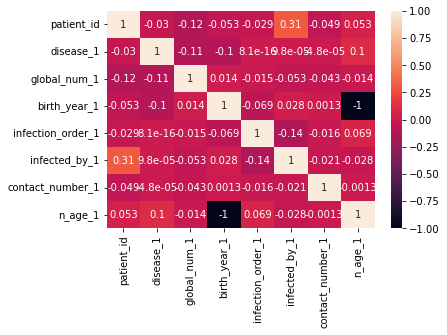

In [32]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)

**<font color='teal'> Plot the boxplots to check for outliers. </font>**

In [35]:
df['disease_1'].unique()

array([0, 1], dtype=int64)

In [36]:
df['infection_order_1'].unique()

array([1.        , 2.        , 3.        , 4.        , 5.        ,
       2.28571429, 6.        ])

In [38]:
df['contact_number_1'].nunique()

73

<AxesSubplot:>

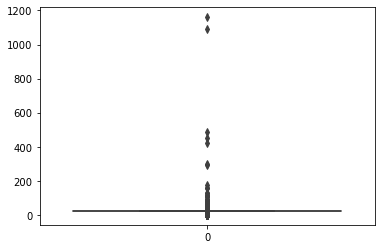

In [39]:
sns.boxplot(data=df['contact_number_1'])

In [40]:
df['contact_number_1'].describe()

count    1980.000000
mean       24.149286
std        41.454999
min         0.000000
25%        24.128954
50%        24.128954
75%        24.128954
max      1160.000000
Name: contact_number_1, dtype: float64

<AxesSubplot:>

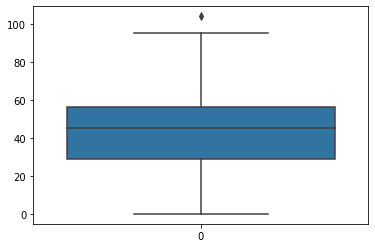

In [41]:
sns.boxplot(data=df['n_age_1'])

In [42]:
# Copy to data to hard disk
df.shape

(1980, 15)

In [43]:
# Copy to data to hard disk
df.to_csv('SouthKoreacoronavirusdataset/df_temp_2.csv')

**<font color='teal'> Create dummy features for object type features. </font>**

In [ ]:
# We have 7 categorical features

In [45]:
df.head()

,patient_id,country,province,disease_1,global_num_1,birth_year_1,infection_order_1,infected_by_1,contact_number_1,n_age_1,infection_case_1,age_1,sex_1,state_1,city_1
0,1000000001,Korea,Seoul,0,2.0,1964.0,1.0,2.600789e+09,75.0,56.0,overseas inflow,50s,male,released,Gangseo-gu
1,1000000002,Korea,Seoul,0,5.0,1987.0,1.0,2.600789e+09,31.0,33.0,overseas inflow,30s,male,released,Jungnang-gu
2,1000000003,Korea,Seoul,0,6.0,1964.0,2.0,2.002000e+09,17.0,56.0,contact with patient,50s,male,released,Jongno-gu
3,1000000004,Korea,Seoul,0,7.0,1991.0,1.0,2.600789e+09,9.0,29.0,overseas inflow,20s,male,released,Mapo-gu
4,1000000005,Korea,Seoul,0,9.0,1992.0,2.0,1.000000e+09,2.0,28.0,contact with patient,20s,female,released,Seongbuk-gu


In [47]:
df.shape

(1980, 15)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 2217
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         1980 non-null   int64  
 1   country            1980 non-null   object 
 2   province           1980 non-null   object 
 3   disease_1          1980 non-null   int64  
 4   global_num_1       1980 non-null   float64
 5   birth_year_1       1980 non-null   float64
 6   infection_order_1  1980 non-null   float64
 7   infected_by_1      1980 non-null   float64
 8   contact_number_1   1980 non-null   float64
 9   n_age_1            1980 non-null   float64
 10  infection_case_1   1980 non-null   object 
 11  age_1              1980 non-null   object 
 12  sex_1              1980 non-null   object 
 13  state_1            1980 non-null   object 
 14  city_1             1980 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 312.0+ KB


In [ ]:
# We did this before
# Return a subset of the DataFrame’s columns based on the column dtypes.
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
dfo
# Then we did this
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn
# Probably, without inplace=True, here you still get unordered vn dataframe

In [51]:
%who

column_names	 datetime	 df	 dfo	 duplicateRowsDF	 duplicates	 np	 os	 pd	 
plt	 sns	 timedelta	 url	 vn	 


In [52]:
vn

,VarName,LevelsCount
0,country,4
1,province,17
2,infection_case_1,16
3,age_1,11
4,sex_1,2
5,state_1,3
6,city_1,134


In [62]:
# Prepare list of categorical var except the target (label) state_1
cat_var = vn.VarName.tolist()
type(cat_var)

list

In [64]:
cat_var.remove('state_1')
cat_var

['country', 'province', 'infection_case_1', 'age_1', 'sex_1', 'city_1']

In [65]:
# Create dummies variable for these 6 categories variable
df_dummies = pd.get_dummies(df, columns=cat_var)
print("Column names: ", df_dummies.columns.to_list())
print("\n")
print("Number of columns: ", len(df_dummies.columns.to_list()))

Column names:  ['patient_id', 'disease_1', 'global_num_1', 'birth_year_1', 'infection_order_1', 'infected_by_1', 'contact_number_1', 'n_age_1', 'state_1', 'country_China', 'country_Korea', 'country_Mongolia', 'country_Thailand', 'province_Busan', 'province_Chungcheongbuk-do', 'province_Chungcheongnam-do', 'province_Daegu', 'province_Daejeon', 'province_Gangwon-do', 'province_Gwangju', 'province_Gyeonggi-do', 'province_Gyeongsangbuk-do', 'province_Gyeongsangnam-do', 'province_Incheon', 'province_Jeju-do', 'province_Jeollabuk-do', 'province_Jeollanam-do', 'province_Sejong', 'province_Seoul', 'province_Ulsan', 'infection_case_1_Cheongdo Daenam Hospital', 'infection_case_1_Dongan Church', "infection_case_1_Eunpyeong St. Mary's Hospital", 'infection_case_1_Guro-gu Call Center', 'infection_case_1_Ministry of Oceans and Fisheries', 'infection_case_1_Onchun Church', 'infection_case_1_Pilgrimage to Israel', 'infection_case_1_River of Grace Community Church', 'infection_case_1_Seongdong-gu APT',

In [66]:
# Total number of levels
vn.LevelsCount.sum()

187

In [ ]:
# OK, we have 187 total levels, or 184 without state_1. Total number of columns after converting remaining six category var
# into dummies should be 15 + 184 - 6 = 193

### Split the data into test and train subsamples

In [69]:
# Copy df_dummies to hard_disk
df_dummies.to_csv('SouthKoreacoronavirusdataset/df_dummies_temp.csv')

In [2]:
# Computer restarted so need to reload df_dummies
df_dummies = pd.read_csv('SouthKoreacoronavirusdataset/df_dummies_temp.csv', index_col=0)

In [3]:
df_dummies.head()

,patient_id,disease_1,global_num_1,birth_year_1,infection_order_1,infected_by_1,contact_number_1,n_age_1,state_1,country_China,...,city_1_Yeongju-si,city_1_Yeongyang-gun,city_1_Yeonje-gu,city_1_Yeonsu-gu,city_1_Yeosu-si,city_1_Yongin-si,city_1_Yongsan-gu,city_1_Yuseong-gu,city_1_etc,city_1_pocheon-si
0,1000000001,0,2.0,1964.0,1.0,2.600789e+09,75.0,56.0,released,0,...,0,0,0,0,0,0,0,0,0,0
1,1000000002,0,5.0,1987.0,1.0,2.600789e+09,31.0,33.0,released,0,...,0,0,0,0,0,0,0,0,0,0
2,1000000003,0,6.0,1964.0,2.0,2.002000e+09,17.0,56.0,released,0,...,0,0,0,0,0,0,0,0,0,0
3,1000000004,0,7.0,1991.0,1.0,2.600789e+09,9.0,29.0,released,0,...,0,0,0,0,0,0,0,0,0,0
4,1000000005,0,9.0,1992.0,2.0,1.000000e+09,2.0,28.0,released,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Count target variable
df_dummies.state_1.value_counts()

isolated    1642
released     306
deceased      32
Name: state_1, dtype: int64

<AxesSubplot:xlabel='state_1', ylabel='count'>

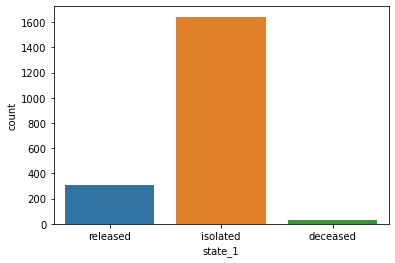

In [5]:
sns.countplot(x='state_1', data=df_dummies)

In [6]:
# Define X (our features matrix) and y (our labels column)
# For X we will exclude label var "state_1" and 4 other ["patient_id", "global_num_1", "birth_year_1", "infected_by_1"]
# Question: should we exclude "infected_by_1". Let assume "YES", the virus at that time is homogenous
y = df_dummies['state_1']
X = df_dummies.drop(["state_1", "patient_id", "global_num_1", "birth_year_1", "infected_by_1"], axis=1)
print(y.shape)
print(X.shape)

(1980,)
(1980, 188)


In [7]:
# Split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1584, 188)
(396, 188)
(1584,)
(396,)


In [12]:
# TN Try a Decision Tree with max_depth of 3
from sklearn.tree import DecisionTreeClassifier

tn_first = DecisionTreeClassifier(random_state=1234, max_depth=3)
tn_first.fit(X_train, y_train)
tn_first

DecisionTreeClassifier(max_depth=3, random_state=1234)

[Text(223.20000000000002, 190.26, 'X[0] <= 0.5\ngini = 0.289\nsamples = 1584\nvalue = [26, 1313, 245]'),
 Text(167.4, 135.9, 'X[128] <= 0.5\ngini = 0.274\nsamples = 1568\nvalue = [10, 1313, 245]'),
 Text(111.60000000000001, 81.53999999999999, 'X[2] <= 23.5\ngini = 0.266\nsamples = 1557\nvalue = [10, 1313, 234]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.407\nsamples = 274\nvalue = [0, 196, 78]'),
 Text(167.4, 27.180000000000007, 'gini = 0.227\nsamples = 1283\nvalue = [10, 1117, 156]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0]')]

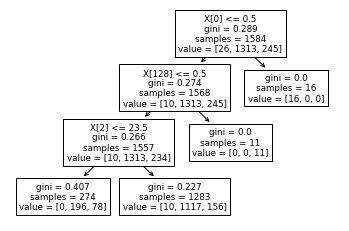

In [13]:
from sklearn import tree
tree.plot_tree(tn_first)

In [14]:
X.head(3)

,disease_1,infection_order_1,contact_number_1,n_age_1,country_China,country_Korea,country_Mongolia,country_Thailand,province_Busan,province_Chungcheongbuk-do,...,city_1_Yeongju-si,city_1_Yeongyang-gun,city_1_Yeonje-gu,city_1_Yeonsu-gu,city_1_Yeosu-si,city_1_Yongin-si,city_1_Yongsan-gu,city_1_Yuseong-gu,city_1_etc,city_1_pocheon-si
0,0,1.0,75.0,56.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,31.0,33.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,17.0,56.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X['disease_1'].value_counts()

0    1961
1      19
Name: disease_1, dtype: int64

### Scale data to prep for model creation

In [17]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
len(scaler.mean_)

188

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import f1_score
# from sklearn.metrics import auc
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

### Fit Random Forest Classifier
The fit model shows an overall accuracy of 80% which is great and indicates our model was effectively able to identify the status of a patients in the South Korea dataset.

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.833
Random Forest: f1-score=0.811


In [23]:
y_pred_prob[:3,:]

array([[0.        , 1.        , 0.        ],
       [0.        , 0.87940084, 0.12059916],
       [0.        , 0.97      , 0.03      ]])

In [24]:
y_test[:3]

1310    isolated
1587    isolated
861     isolated
Name: state_1, dtype: object

In [27]:
cm
# True label in y-axis, predicted label in x-axis

array([[  5,   1,   0],
       [  1, 311,  17],
       [  0,  47,  14]], dtype=int64)

### Create Confusion Matrix Plots
Confusion matrices are great ways to review your model performance for a multi-class classification problem. Being able to identify which class the misclassified observations end up in is a great way to determine if you need to build additional features to improve your overall model. In the example below we plot a regular counts confusion matrix as well as a weighted percent confusion matrix. The percent confusion matrix is particulary helpful when you have unbalanced class sizes.

In [29]:
class_names=['isolated','released','missing','deceased'] # name  of classes

Confusion matrix, without normalization
[[  5   1   0]
 [  1 311  17]
 [  0  47  14]]
Normalized confusion matrix
[[0.83 0.17 0.  ]
 [0.   0.95 0.05]
 [0.   0.77 0.23]]


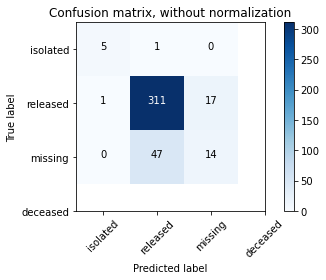

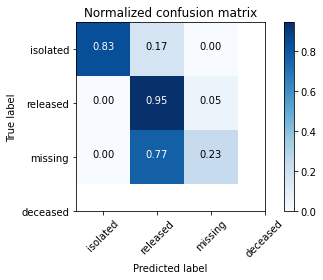

In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

### Plot feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

30


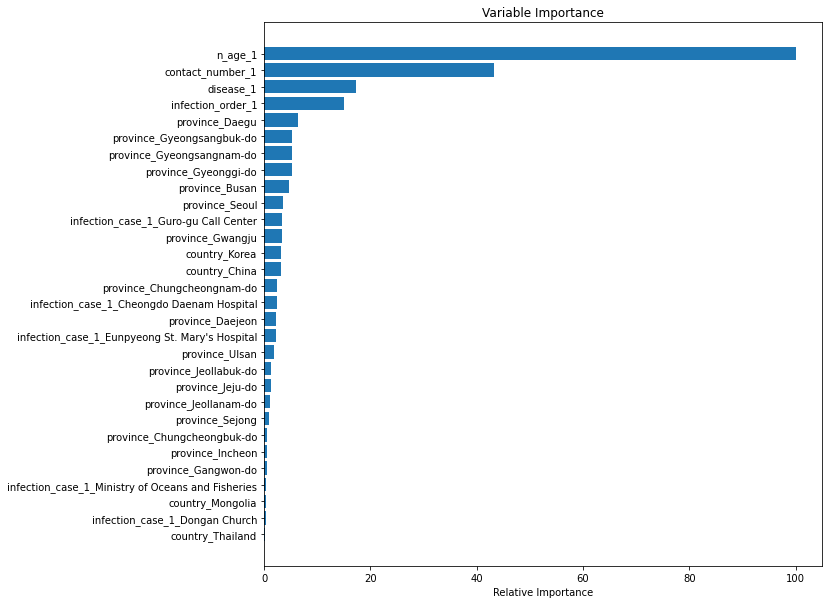

In [31]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30] #Take the first 30 features
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [34]:
feature_importance

array([1.73e+01, 1.51e+01, 4.33e+01, 1.00e+02, 3.15e+00, 3.22e+00,
       3.11e-01, 7.38e-02, 4.60e+00, 4.89e-01, 2.50e+00, 6.36e+00,
       2.27e+00, 4.58e-01, 3.29e+00, 5.21e+00, 5.28e+00, 5.27e+00,
       4.64e-01, 1.25e+00, 1.27e+00, 1.00e+00, 8.37e-01, 3.56e+00,
       1.78e+00, 2.41e+00, 3.01e-01, 2.25e+00, 3.32e+00, 3.55e-01])

In [35]:
clf.feature_importances_.shape

(188,)

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model would not. In this case study we demonstrate the performance ability even with only a few features and almost all of them being highly correlated with each other.
Random Forest is also used as an efficient way to investigate the importance of a set of features with a large data set. Consider random forest to be one of your first choices when building a decision tree, especially for multiclass classifications.